In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re as re
## קריאת כל הטבלאות למשתנים 
orders=pd.read_excel('Northwind.xlsx', sheet_name='Orders')
orders_details= pd.read_excel('Northwind.xlsx', sheet_name='Order Details')
employee_territories=pd.read_excel('Northwind.xlsx', sheet_name='Employee Territories')
employees=pd.read_excel('Northwind.xlsx', sheet_name='Employees')
category=pd.read_excel('Northwind.xlsx', sheet_name='Category')
customers=pd.read_excel('Northwind.xlsx', sheet_name='Customers')
shippers=pd.read_excel('Northwind.xlsx', sheet_name='Shippers')
suppliers=pd.read_excel('Northwind.xlsx', sheet_name='Suppliers')
products=pd.read_excel('Northwind.xlsx', sheet_name='Products')
region=pd.read_excel('Northwind.xlsx', sheet_name='Region')
territorries=pd.read_excel('Northwind.xlsx', sheet_name='Territorries')


In [ ]:

##הסתכלות ראשונית על כל טבלה וטבלה והאם צריך להמיר עמודות לסוג מסויים

orders.info() #customerid need to be replaced to int64
orders_details.info() #ok
employee_territories.info() #ok
employees.info() #ok
category.info() #ok
customers.info() #customerid need to be replaced to int64
category.info() #ok
shippers.info() #ok
suppliers.info() #ok
products.info() #ok
region.info() #ok
territorries.info() #ok

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   OrderID         830 non-null    int64         
 1   CustomerID      830 non-null    object        
 2   EmployeeID      830 non-null    int64         
 3   OrderDate       830 non-null    datetime64[ns]
 4   RequiredDate    830 non-null    datetime64[ns]
 5   ShippedDate     809 non-null    datetime64[ns]
 6   ShipVia         830 non-null    int64         
 7   Freight         830 non-null    float64       
 8   ShipName        830 non-null    object        
 9   ShipAddress     830 non-null    object        
 10  ShipCity        830 non-null    object        
 11  ShipRegion      323 non-null    object        
 12  ShipPostalCode  811 non-null    object        
 13  ShipCountry     830 non-null    object        
dtypes: datetime64[ns](3), float64(1), int64(3), object(7)
memo

In [ ]:

##יצירת פונקצייה להמרה ל-snape case

def clean_df_columns(df):
    df.columns = (
        df.columns
        # CamelCase → snake_case
        .str.replace('([a-z0-9])([A-Z])', r'\1_\2', regex=True)
        # כל סוגי הרווחים (כולל נסתרים) → _
        .str.replace(r'\s+', '_', regex=True)
        # מקפים → _
        .str.replace('-', '_')
        # ניקוי קצוות
        .str.strip('_')
        # אותיות קטנות
        .str.lower()
    )
    return df


In [ ]:
#ניקוי כל הטבלאות

clean_df_columns(orders)
clean_df_columns(orders_details)
clean_df_columns(employee_territories)
clean_df_columns(employees)
clean_df_columns(category)
clean_df_columns(customers)
clean_df_columns(shippers)
clean_df_columns(suppliers)
clean_df_columns(products)
clean_df_columns(region)
clean_df_columns(territorries)

,territory_id,territory_description,region_id
0,1581,Westboro,1
1,1730,Bedford,1
2,1833,Georgetow,1
3,2116,Boston,1
4,2139,Cambridge,1
5,2184,Braintree,1
6,2903,Providence,1
7,3049,Hollis,3
8,3801,Portsmouth,3
9,6897,Wilton,1


In [ ]:
#ניתוח של כל טבלה היכן יש null והאם יש צורך לשנותו
orders.isna().sum() #shipped_date-21,ship_region-507, ship_postal_code-19
orders_details.isna().sum() #no-null
employee_territories.isna().sum() #no-null
employees.isna().sum() #report_to-1 ,maybe its manager
category.isna().sum()  #no-null
customers.isna().sum() #region-60, fax-22, postal_code-1
shippers.isna().sum()  #no-null
suppliers.isna().sum() #region-20,fax-16,home_page-24
products.isna().sum()  # 1 null on any column except units_in_stock and units_on_order
# products.tail(25)
region.isna().sum() #no-null
territorries.isna().sum() #no-null
# orders.isnull().mean() *100



territory_id             0
territory_description    0
region_id                0
dtype: int64

In [6]:
#הצגת כלל העמודות עם ערכים חסרים בטבלת הזמנות, כדי לקבל מידע יותר מדוייק
# pd.set_option('display.max_rows', None) 
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', None)

#החזרת ההגדרות לקדמותן
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

orders[orders.isnull().any(axis=1)] 

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,NaN,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitהten,Luisenstr. 48,Mnster,NaN,44087,Germany
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,NaN,69004,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprךmes dיlices,"Boulevard Tirou, 255",Charleroi,NaN,B-6000,Belgium
6,10254,CHOPS,5,1996-07-11,1996-08-08,1996-07-23,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,NaN,3012,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05,1998-06-02,NaT,2,24.95,Pericles Comidas clבsicas,Calle Dr. Jorge Cash 321,Mיxico D.F.,NaN,5033,Mexico
826,11074,SIMOB,7,1998-05-06,1998-06-03,NaT,2,18.44,Simons bistro,Vinbזltet 34,Kobenhavn,NaN,1734,Denmark
827,11075,RICSU,8,1998-05-06,1998-06-03,NaT,2,6.19,Richter Supermarkt,Starenweg 5,Genטve,NaN,1204,Switzerland
828,11076,BONAP,4,1998-05-06,1998-06-03,NaT,2,38.28,Bon app',"12, rue des Bouchers",Marseille,NaN,13008,France


In [ ]:
#לדוגמא טבלת ההזמנות וטיפול של null
orders['ship_region']=orders['ship_region'].fillna('unknown')
orders['ship_postal_code']=orders['ship_postal_code'].fillna('unknown')
# in this column there is 21 null, and i perefer to stay them because its no missing-information its means the order not shipped yet
orders['shipped_date'] 
orders.isnull().sum()

order_id             0
customer_id          0
employee_id          0
order_date           0
required_date        0
shipped_date        21
ship_via             0
freight              0
ship_name            0
ship_address         0
ship_city            0
ship_region          0
ship_postal_code     0
ship_country         0
dtype: int64

In [8]:
orders['day_p'] = orders['order_date'].dt.day
orders_per_day= orders.groupby('day_p').agg(count_sales=('order_id','count')).reset_index().sort_values('day_p')

orders_per_day 

,day_p,count_sales
0,1,26
1,2,27
2,3,30
3,4,27
4,5,31
5,6,33
6,7,22
7,8,21
8,9,31
9,10,28


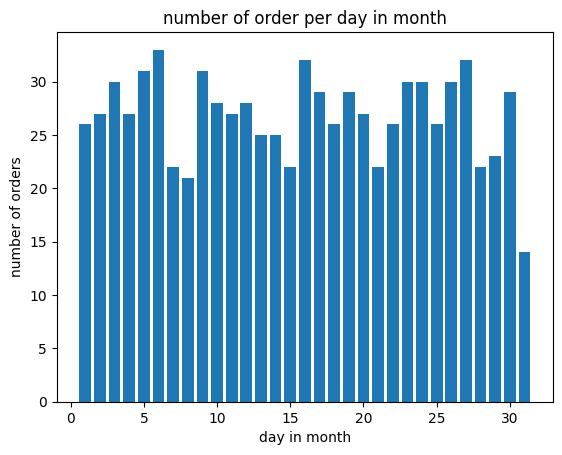

In [9]:
plt.figure()
plt.bar(orders_per_day['day_p'], orders_per_day['count_sales'])
plt.xlabel('day in month')
plt.ylabel('number of orders')
plt.title('number of order per day in month')
plt.show()

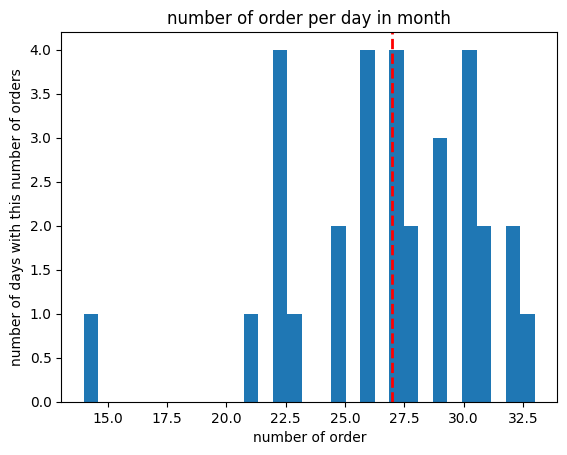

In [15]:
data=orders_per_day['count_sales']
median_val = data.median()
plt.figure()
plt.hist(data,bins=31)
plt.axvline(median_val,color='red', linestyle='--', linewidth=2, label=f'חציון = {median_val}')
plt.xlabel('number of order')
plt.ylabel('number of days with this number of orders')
plt.title('number of order per day in month')
plt.show()

In [12]:
orders['month_p'] = orders['order_date'].dt.month
orders_per_month= orders.groupby('month_p').agg(count_sales=('order_id','count')).reset_index().sort_values('month_p')

orders_per_month

,month_p,count_sales
0,1,88
1,2,83
2,3,103
3,4,105
4,5,46
5,6,30
6,7,55
7,8,58
8,9,60
9,10,64


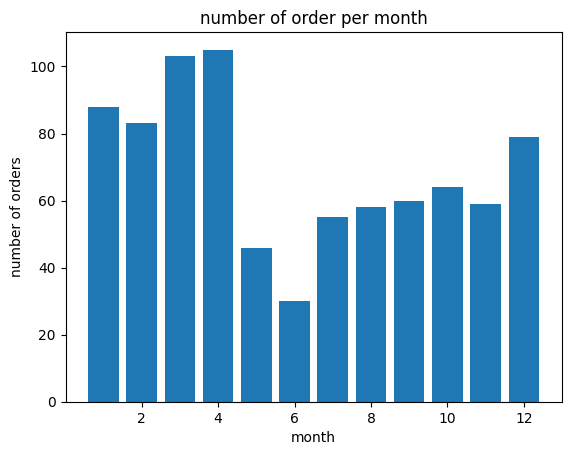

In [13]:
plt.figure()
plt.bar(orders_per_month['month_p'], orders_per_month['count_sales'])
plt.xlabel('month')
plt.ylabel('number of orders')
plt.title('number of order per month')
plt.show()

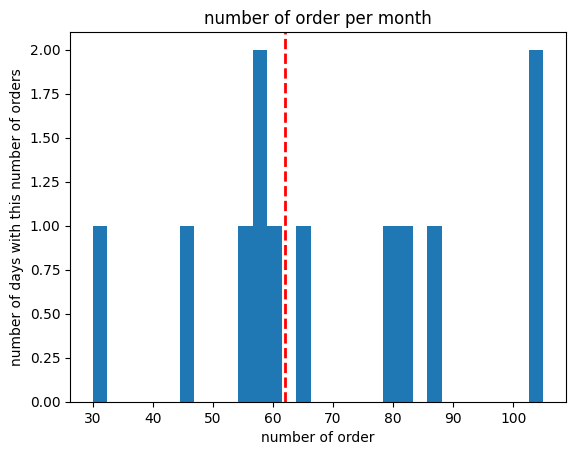

In [18]:
data=orders_per_month['count_sales']
median_val = data.median()
plt.figure()
plt.hist(data,bins=31)
plt.axvline(median_val,color='red', linestyle='--', linewidth=2, label=f'חציון = {median_val}')
plt.xlabel('number of order')
plt.ylabel('number of days with this number of orders')
plt.title('number of order per month')
plt.show()